Estimators
See https://nbviewer.jupyter.org/github/pablormier/prml-bishop-notebooks/blob/master/notebooks/A1.%20Biased%20and%20Unbiased%20Point%20Estimators%20-%20Sample%20mean%20and%20variance.ipynb

http://www.turingfinance.com/regression-analysis-using-python-statsmodels-and-quandl/
    

Here we are going to explain how to compute $\cos x$.

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 16,10

In [3]:
def mean(x): return sum(x) / len(x)

def var(x, m=None):
    m = m or mean(x)
    return sum([(xe - m)**2 for xe in x]) / len(x)

In [4]:
import random as rnd
population_size = 500000
population = [rnd.randint(0, 100) for _ in range(population_size)]

In [5]:
population_mean = mean(population)
population_var = var(population, population_mean)
print("population mean: {:.2f}, population variance: {:.2f}".format(population_mean, population_var))

population mean: 49.98, population variance: 849.93


In [6]:
sample = rnd.sample(population, 10)
sample_mean = mean(sample)
sample_var = var(sample)
print("sample mean: {:.2f}, sample variance: {:.2f}".format(sample_mean, sample_var))

sample mean: 52.80, sample variance: 860.96


In [7]:
sample_means, sample_vars = [], []
for _ in range(100000):
    sample = rnd.sample(population, 10)
    m = mean(sample)
    sample_means.append(m)
    sample_vars.append(var(sample, m))

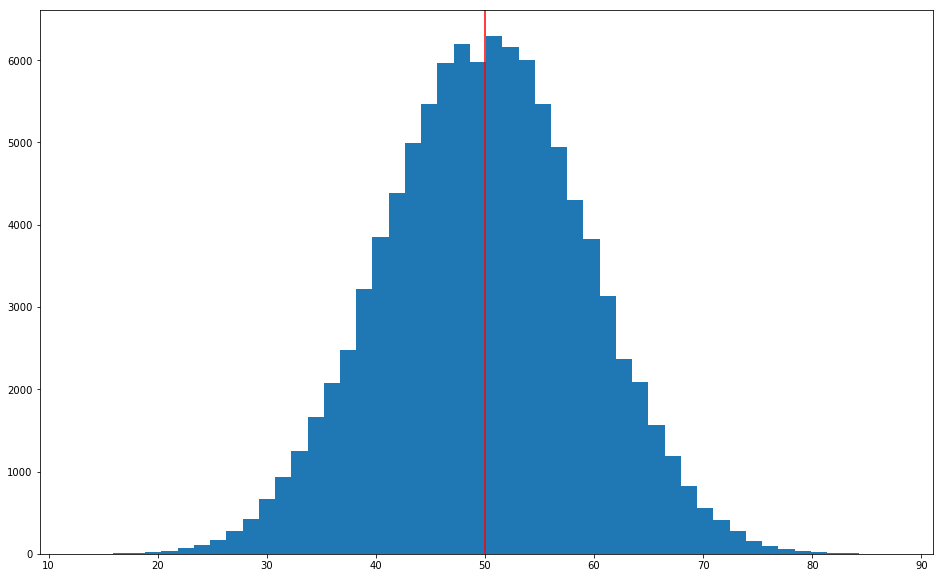

In [8]:
plt.hist(sample_means, 50)
plt.axvline(population_mean, color='red');

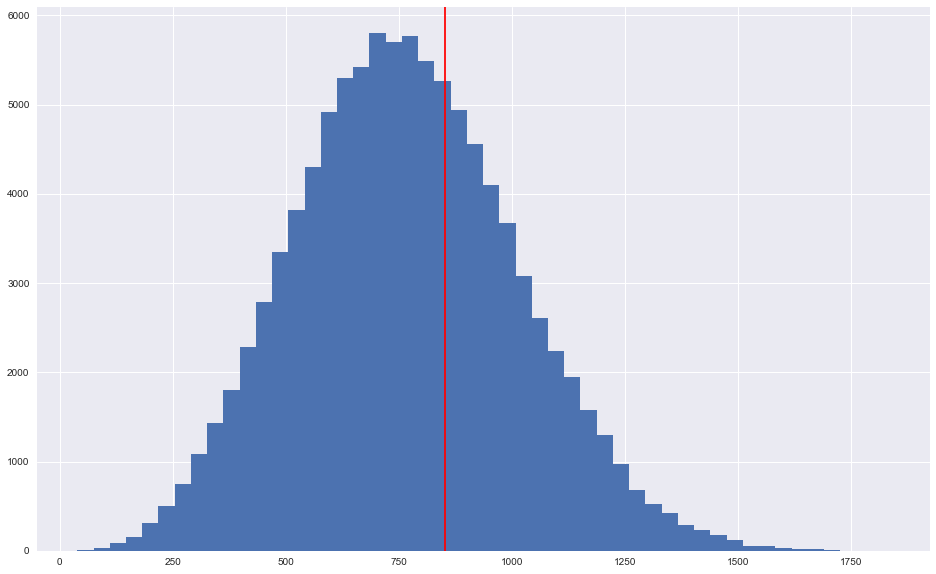

In [213]:
plt.hist(sample_vars, 50);
plt.axvline(population_var, color='red');

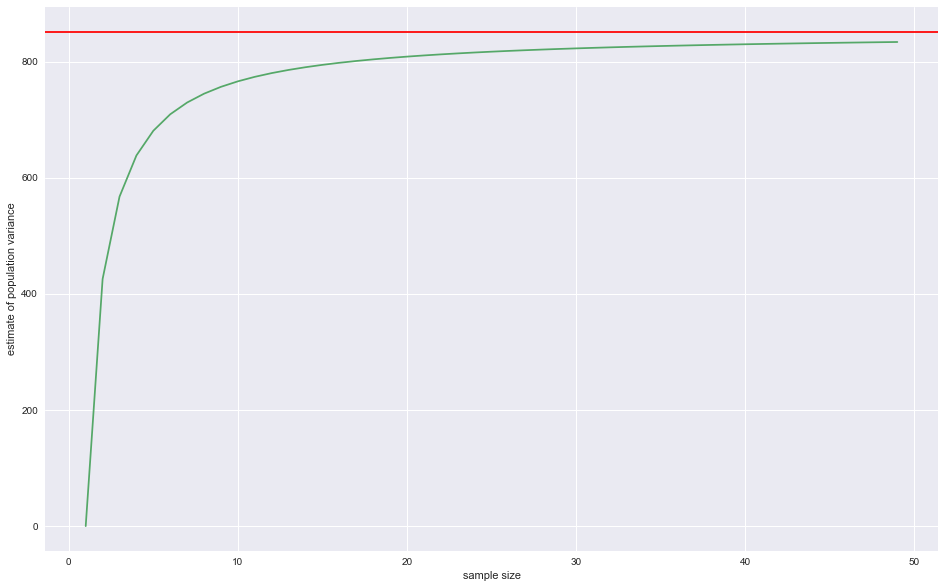

In [214]:
sample_sizes, sample_vars = [], []
for ss in range(1, 50):
    sample_sizes.append(ss)
    sample_vars.append(mean([var(rnd.sample(population, ss)) for _ in range(1000)]))
plt.plot(sample_sizes, sample_vars, 'x')
plt.axhline(population_var, color='red')
plt.plot(sample_sizes, [(n-1)/n * population_var for n in sample_sizes])
plt.xlabel('sample size')
plt.ylabel('estimate of population variance');

In [215]:
def sample_var(x, m=None):
    m = m or mean(x)
    n = len(x)
    return n/(n-1) * var(x, m)

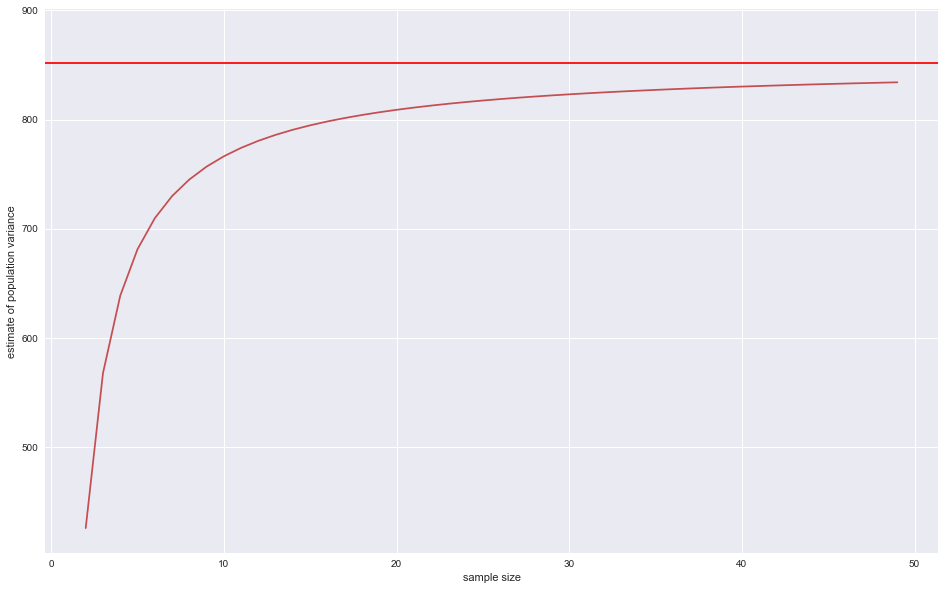

In [216]:
sample_sizes, sample_vars, sample_vars1 = [], [], []
for ss in range(2, 50):
    sample_sizes.append(ss)
    sample_vars.append(mean([var(rnd.sample(population, ss)) for _ in range(1000)]))
    sample_vars1.append(mean([sample_var(rnd.sample(population, ss)) for _ in range(1000)]))
plt.plot(sample_sizes, sample_vars, 'x')
plt.plot(sample_sizes, sample_vars1, 'x')
plt.axhline(population_var, color='red')
plt.plot(sample_sizes, [(n-1)/n * population_var for n in sample_sizes])
plt.xlabel('sample size')
plt.ylabel('estimate of population variance');

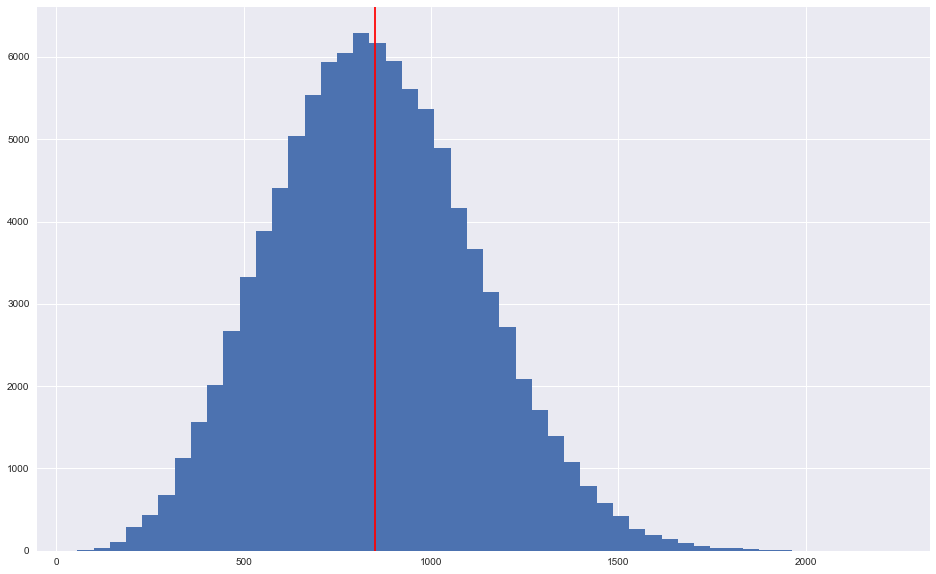

In [217]:
sample_means, sample_vars = [], []
for _ in range(100000):
    sample = rnd.sample(population, 10)
    m = mean(sample)
    sample_vars.append(sample_var(sample, m))
    
plt.hist(sample_vars, 50)
plt.axvline(population_var, color='red');

In [218]:
def mean1(x): return (sum(x) + 10.) / len(x)
def mean2(x): return x[0]

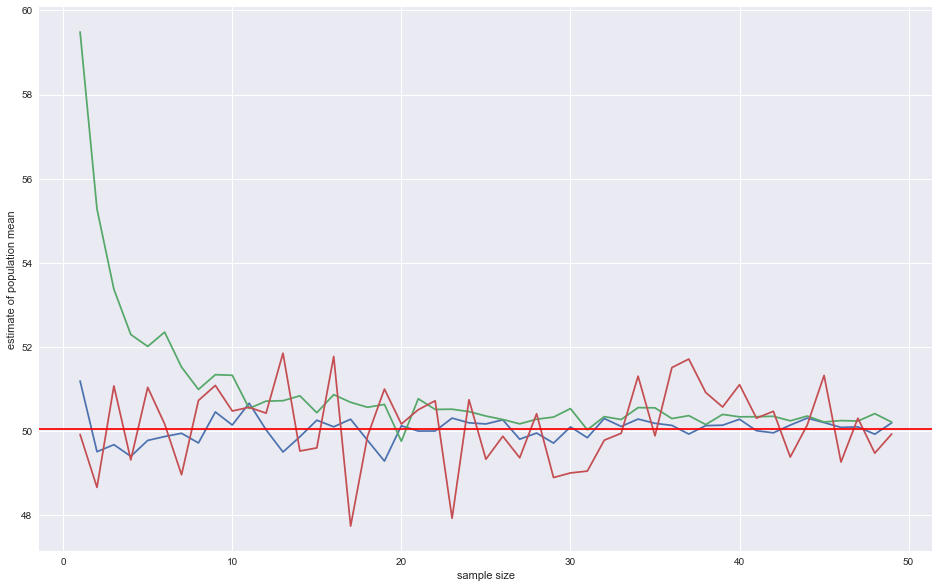

In [219]:
sample_sizes, sample_means, sample_means1, sample_means2 = [], [], [], []
for ss in range(1, 50):
    sample_sizes.append(ss)
    sample_means.append(mean([mean(rnd.sample(population, ss)) for _ in range(1000)]))
    sample_means1.append(mean([mean1(rnd.sample(population, ss)) for _ in range(1000)]))
    sample_means2.append(mean([mean2(rnd.sample(population, ss)) for _ in range(1000)]))
plt.plot(sample_sizes, sample_means, 'x-')
plt.plot(sample_sizes, sample_means1, 'x-')
plt.plot(sample_sizes, sample_means2, 'x-')
plt.axhline(population_mean, color='red')
plt.xlabel('sample size')
plt.ylabel('estimate of population mean');

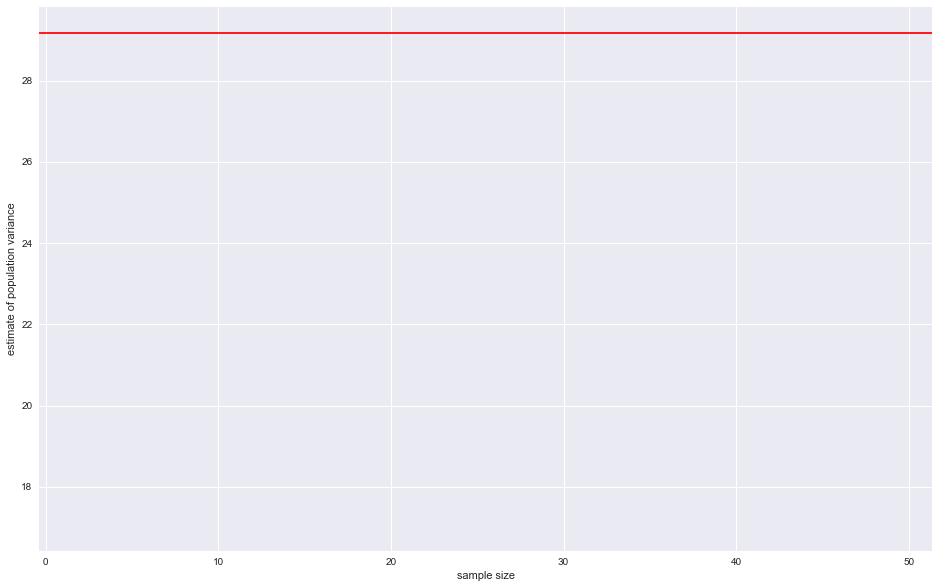

In [220]:
import math
sample_sizes, sample_sds, sample_sds1 = [], [], []
for ss in range(2, 50):
    sample_sizes.append(ss)
    sample_sds.append(mean([math.sqrt(var(rnd.sample(population, ss))) for _ in range(1000)]))
    sample_sds1.append(mean([math.sqrt(sample_var(rnd.sample(population, ss))) for _ in range(1000)]))
plt.plot(sample_sizes, sample_sds, 'x')
plt.plot(sample_sizes, sample_sds1, 'x')
plt.axhline(math.sqrt(population_var), color='red')
plt.xlabel('sample size')
plt.ylabel('estimate of population variance');

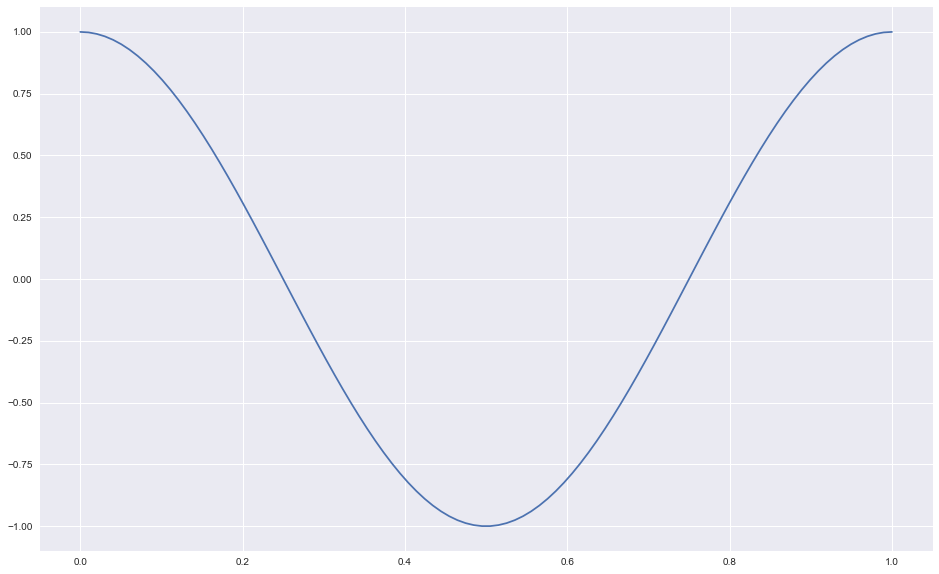

In [221]:
import numpy as np

def true_fun(x): return np.cos(2. * np.pi * x)

sample_size = 10
dense_x = np.linspace(0., 1., 100)
x = np.sort(np.random.rand(sample_size))
y = true_fun(x) + np.random.randn(sample_size) * 0.1

plt.plot(dense_x, true_fun(dense_x))
plt.plot(x, y, 'x');

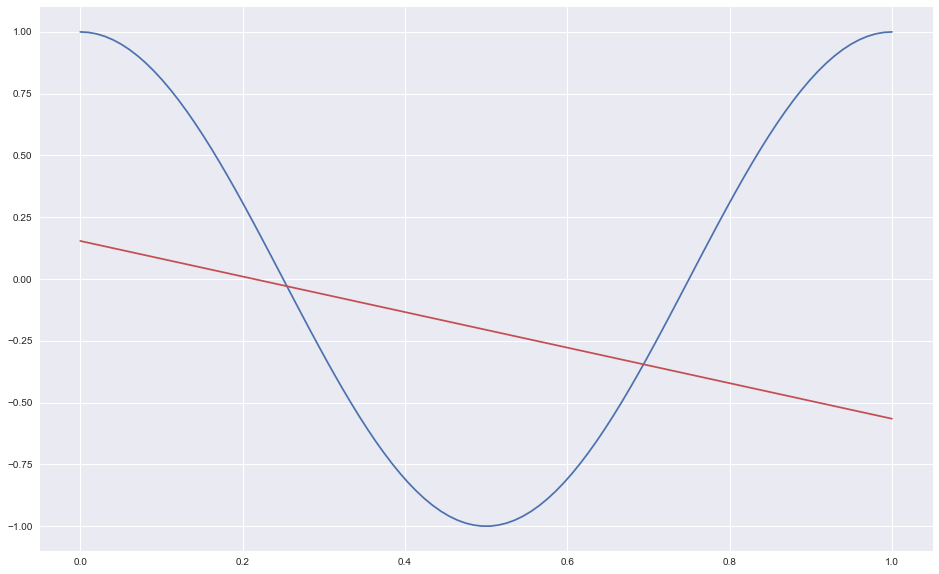

In [222]:
z = np.polyfit(x, y, 1)
plt.plot(dense_x, true_fun(dense_x))
plt.plot(x, y, 'x')
plt.plot(dense_x, np.poly1d(z)(dense_x));

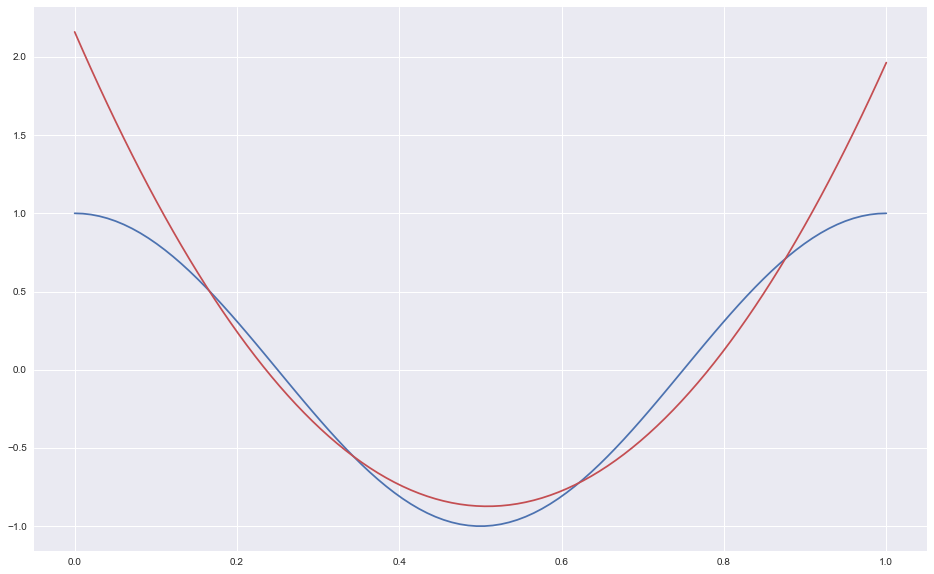

In [223]:
z = np.polyfit(x, y, 2)
plt.plot(dense_x, true_fun(dense_x))
plt.plot(x, y, 'x')
plt.plot(dense_x, np.poly1d(z)(dense_x));

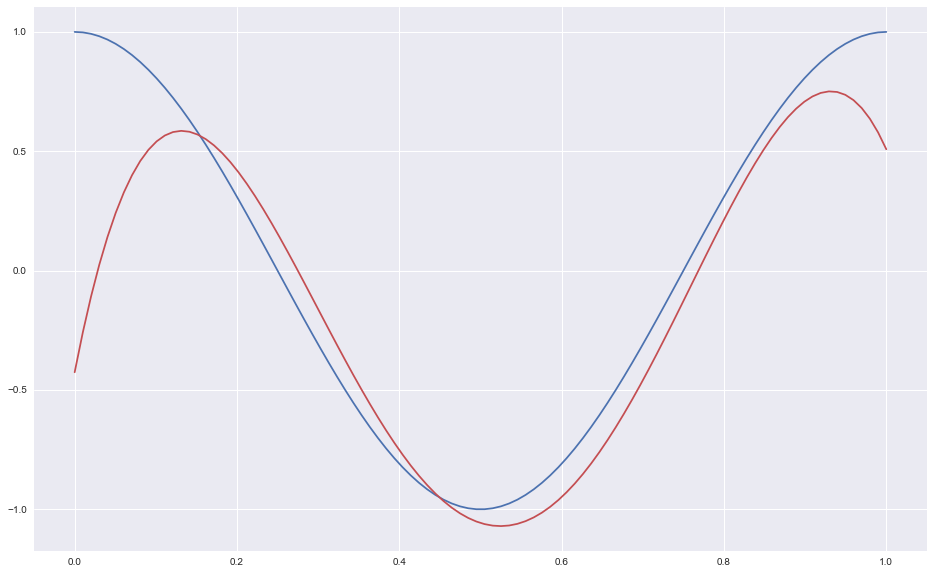

In [224]:
z = np.polyfit(x, y, 4)
plt.plot(dense_x, true_fun(dense_x))
plt.plot(x, y, 'x')
plt.plot(dense_x, np.poly1d(z)(dense_x));

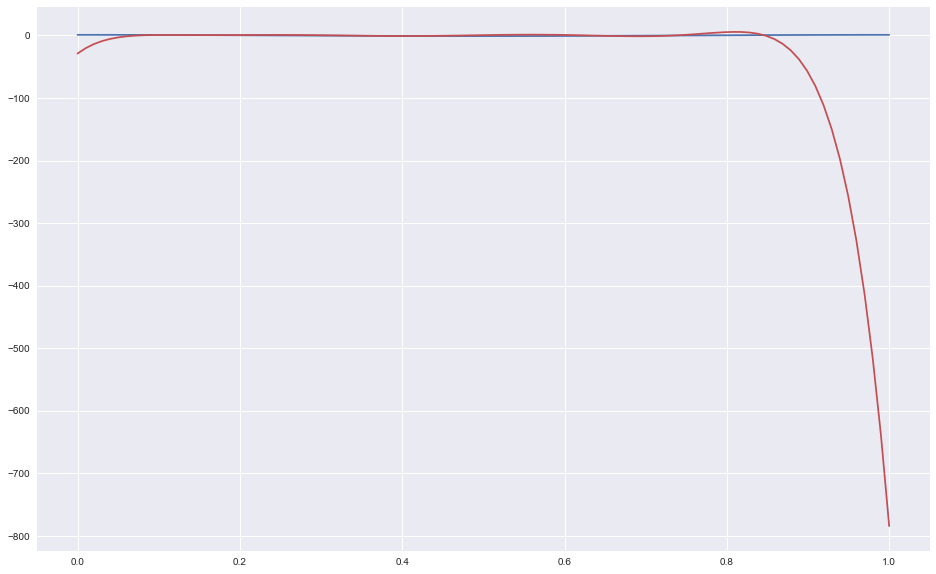

In [225]:
z = np.polyfit(x, y, 8)
plt.plot(dense_x, true_fun(dense_x))
plt.plot(x, y, 'x')
plt.plot(dense_x, np.poly1d(z)(dense_x));

We use exxeleron qPython to interface with Python:

https://github.com/exxeleron/qPython

Install it using
    
    pip install qpython
    
On Windows you may need

    http://landinghub.visualstudio.com/visual-cpp-build-tools
    
and follow the advice (for x86 or x64) from

    https://stackoverflow.com/questions/14372706/visual-studio-cant-build-due-to-rc-exe

Contract: Crude Oil West Texas Intermediate
Exchange: NYMEX
Contract size: 1,000 US barrels (42,000 gallons)
Margin/maintenance: $2,640/2,400
Tick size: 1 cent per barrel ($10.00 per contract)
Point value: $1,000
First notice date: 2016.05.24
Expiration date: 2016.05.20

V = 40 means: 40 * (point value) per 1 contract, i.e.
40 * $1,000 per 1 contract, i.e.
40 * $1,000 per 1 * 1,000 US barrels, i.e.
$40 per barrel

In [10]:
from qpython import qconnection
q = qconnection.QConnection(host='localhost', port=41822)
q.open()

In [11]:
df = q('select datetime: date+time, bidprice, bidsize, askprice, asksize from quotes where date=2016.04.18, sym=`CLM16', pandas=True, numpy_temporals=True)

In [12]:
df.head(20)

,datetime,bidprice,bidsize,askprice,asksize
0,2016-04-18 00:00:00.159,39.79,7,39.8,3
1,2016-04-18 00:00:00.739,39.79,6,39.8,3
2,2016-04-18 00:00:01.354,39.79,5,39.8,3
3,2016-04-18 00:00:01.354,39.79,5,39.8,4
4,2016-04-18 00:00:01.354,39.79,4,39.8,4
5,2016-04-18 00:00:01.354,39.79,3,39.8,4
6,2016-04-18 00:00:01.354,39.79,3,39.8,5
7,2016-04-18 00:00:01.661,39.79,1,39.8,5
8,2016-04-18 00:00:01.661,39.78,20,39.8,5
9,2016-04-18 00:00:01.661,39.78,20,39.8,6


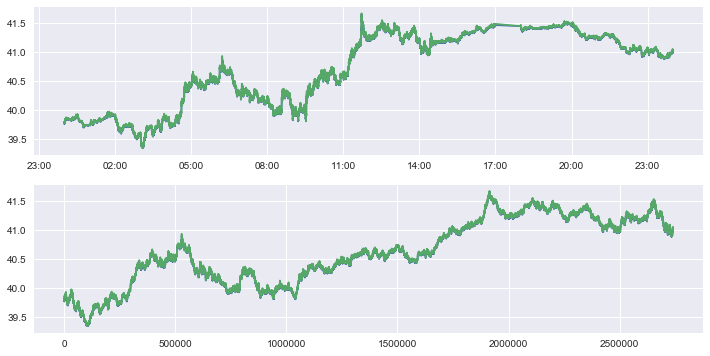

In [229]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(211)
ax.plot(df['datetime'], df['bidprice'])
ax.plot(df['datetime'], df['askprice'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax = fig.add_subplot(212)
ax.plot(df.index, df['bidprice']);
ax.plot(df.index, df['askprice']);

In [230]:
df['midprice'] = .5 * (df['bidprice'] + df['askprice'])
df['dmidprice'] = df['midprice'].diff()

In [231]:
df.head(20)

,datetime,bidprice,bidsize,askprice,asksize,midprice,dmidprice
0,2016-04-18 00:00:00.159,39.79,7,39.8,3,39.795,NaN
1,2016-04-18 00:00:00.739,39.79,6,39.8,3,39.795,0.000
2,2016-04-18 00:00:01.354,39.79,5,39.8,3,39.795,0.000
3,2016-04-18 00:00:01.354,39.79,5,39.8,4,39.795,0.000
4,2016-04-18 00:00:01.354,39.79,4,39.8,4,39.795,0.000
5,2016-04-18 00:00:01.354,39.79,3,39.8,4,39.795,0.000
6,2016-04-18 00:00:01.354,39.79,3,39.8,5,39.795,0.000
7,2016-04-18 00:00:01.661,39.79,1,39.8,5,39.795,0.000
8,2016-04-18 00:00:01.661,39.78,20,39.8,5,39.790,-0.005
9,2016-04-18 00:00:01.661,39.78,20,39.8,6,39.790,0.000


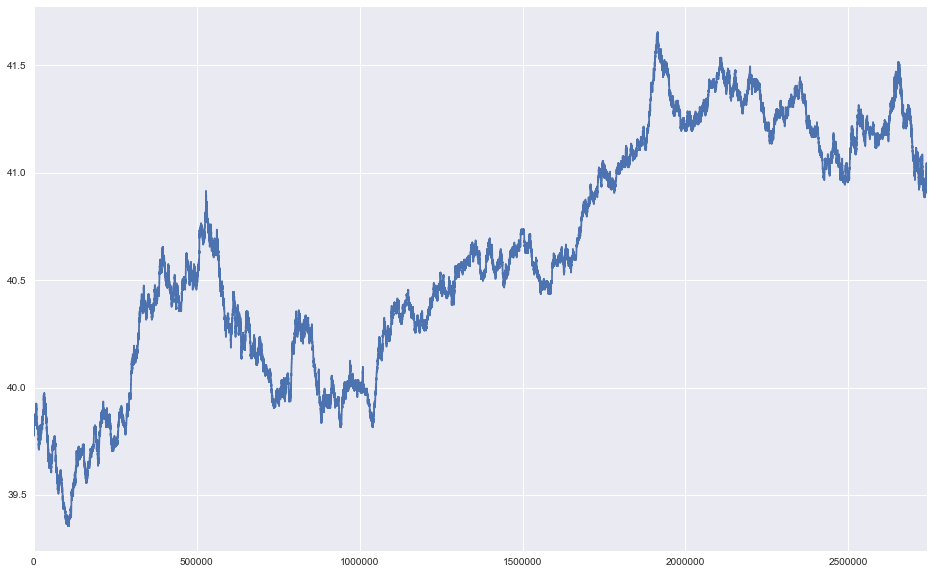

In [232]:
df['midprice'].plot();

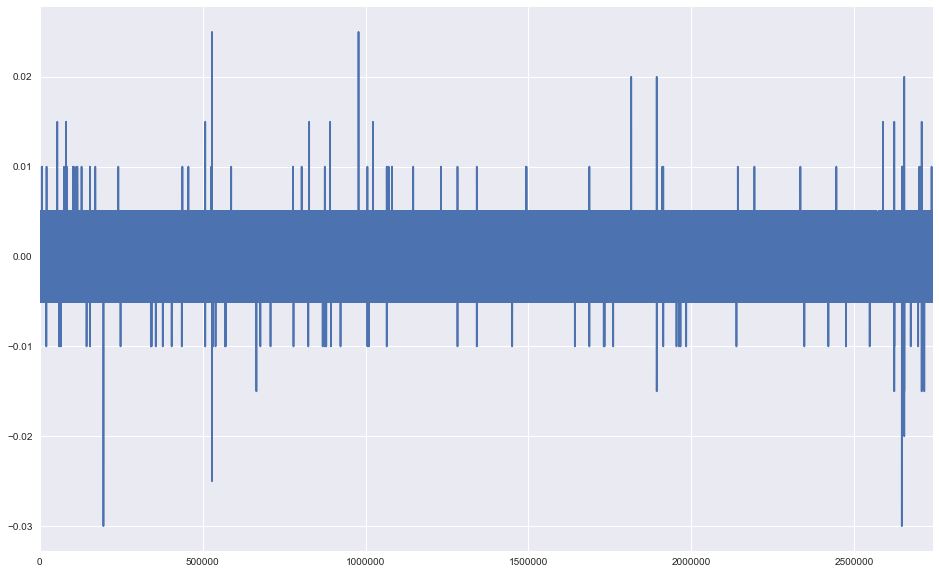

In [233]:
df['dmidprice'].plot();

# Feature Engineering

In this section we define our feature set. Our first regressor is VOI (Shen, 2015)
http://eprints.maths.ox.ac.uk/1895/1/Darryl%20Shen%20%28for%20archive%29.pdf 

In [234]:
dbidsize = df['bidsize'].diff()
dbidprice = df['bidprice'].diff()
cvbid = np.where(dbidprice > 0, df['bidsize'], 0)
cvbid = np.where(dbidprice == 0, dbidsize, cvbid)
cvbid = np.where(dbidprice < 0, 0, cvbid)
dasksize = df['asksize'].diff()
daskprice = df['askprice'].diff()
cvask = np.where(daskprice < 0, df['asksize'], 0)
cvask = np.where(daskprice == 0, dasksize, cvask)
cvask = np.where(daskprice > 0, 0, cvask)
df['voi'] = cvbid - cvask

In [235]:
df.head(20)

,datetime,bidprice,bidsize,askprice,asksize,midprice,dmidprice,voi
0,2016-04-18 00:00:00.159,39.79,7,39.8,3,39.795,NaN,0.0
1,2016-04-18 00:00:00.739,39.79,6,39.8,3,39.795,0.000,-1.0
2,2016-04-18 00:00:01.354,39.79,5,39.8,3,39.795,0.000,-1.0
3,2016-04-18 00:00:01.354,39.79,5,39.8,4,39.795,0.000,-1.0
4,2016-04-18 00:00:01.354,39.79,4,39.8,4,39.795,0.000,-1.0
5,2016-04-18 00:00:01.354,39.79,3,39.8,4,39.795,0.000,-1.0
6,2016-04-18 00:00:01.354,39.79,3,39.8,5,39.795,0.000,-1.0
7,2016-04-18 00:00:01.661,39.79,1,39.8,5,39.795,0.000,-2.0
8,2016-04-18 00:00:01.661,39.78,20,39.8,5,39.790,-0.005,0.0
9,2016-04-18 00:00:01.661,39.78,20,39.8,6,39.790,0.000,-1.0


In [236]:
df.head(20)

,datetime,bidprice,bidsize,askprice,asksize,midprice,dmidprice,voi
0,2016-04-18 00:00:00.159,39.79,7,39.8,3,39.795,NaN,0.0
1,2016-04-18 00:00:00.739,39.79,6,39.8,3,39.795,0.000,-1.0
2,2016-04-18 00:00:01.354,39.79,5,39.8,3,39.795,0.000,-1.0
3,2016-04-18 00:00:01.354,39.79,5,39.8,4,39.795,0.000,-1.0
4,2016-04-18 00:00:01.354,39.79,4,39.8,4,39.795,0.000,-1.0
5,2016-04-18 00:00:01.354,39.79,3,39.8,4,39.795,0.000,-1.0
6,2016-04-18 00:00:01.354,39.79,3,39.8,5,39.795,0.000,-1.0
7,2016-04-18 00:00:01.661,39.79,1,39.8,5,39.795,0.000,-2.0
8,2016-04-18 00:00:01.661,39.78,20,39.8,5,39.790,-0.005,0.0
9,2016-04-18 00:00:01.661,39.78,20,39.8,6,39.790,0.000,-1.0


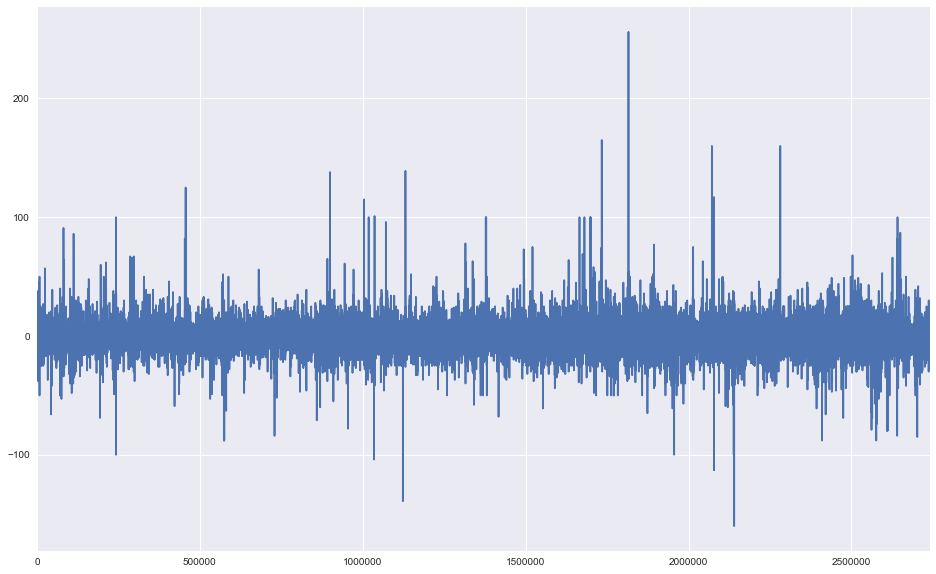

In [237]:
df['voi'].plot();

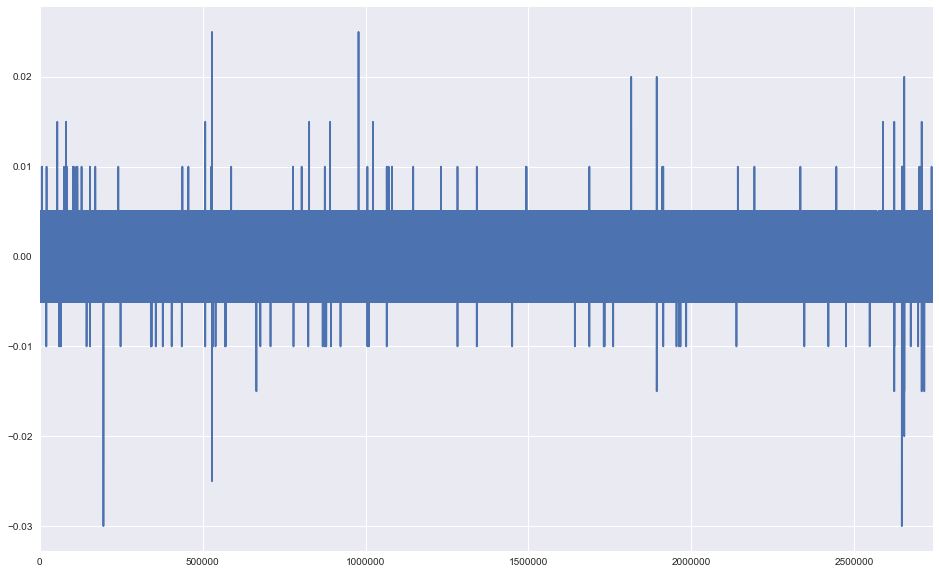

In [238]:
df['dmidprice'].plot();

In [239]:
import statsmodels.api as sm
df.dropna(inplace = True)
model = sm.OLS(df['dmidprice'], df['voi']).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              dmidprice   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                 4.134e+04
Date:                Wed, 20 Sep 2017   Prob (F-statistic):               0.00
Time:                        10:12:23   Log-Likelihood:             1.4844e+07
No. Observations:             2740313   AIC:                        -2.969e+07
Df Residuals:                 2740312   BIC:                        -2.969e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
voi         6.466e-05   3.18e-07    203.319      0.000     6.4e-05    6.53e-05
==============================================================================
Omnibus:                   654181.996   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         42315103.946
Skew:                           0.004   Prob(JB):                         0.00
Kurtosis:                      22.251   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

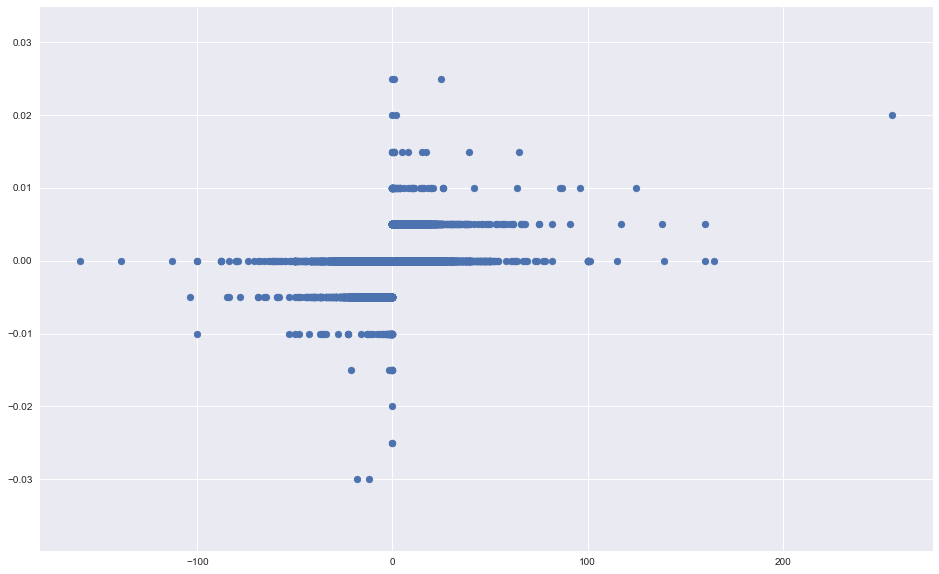

In [240]:
plt.scatter(df.voi, df.dmidprice);

In [241]:
df = df[df['dmidprice'] != 0]
len(df)

127715

In [242]:
model = sm.OLS(df['dmidprice'], df['voi']).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              dmidprice   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                 2.032e+04
Date:                Wed, 20 Sep 2017   Prob (F-statistic):               0.00
Time:                        10:13:05   Log-Likelihood:             5.0451e+05
No. Observations:              127715   AIC:                        -1.009e+06
Df Residuals:                  127714   BIC:                        -1.009e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
voi            0.0006   4.19e-06    142.543      0.000       0.001       0.001
==============================================================================
Omnibus:                    19934.966   Durbin-Watson:                   2.548
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           264593.216
Skew:                          -0.322   Prob(JB):                         0.00
Kurtosis:                      10.022   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

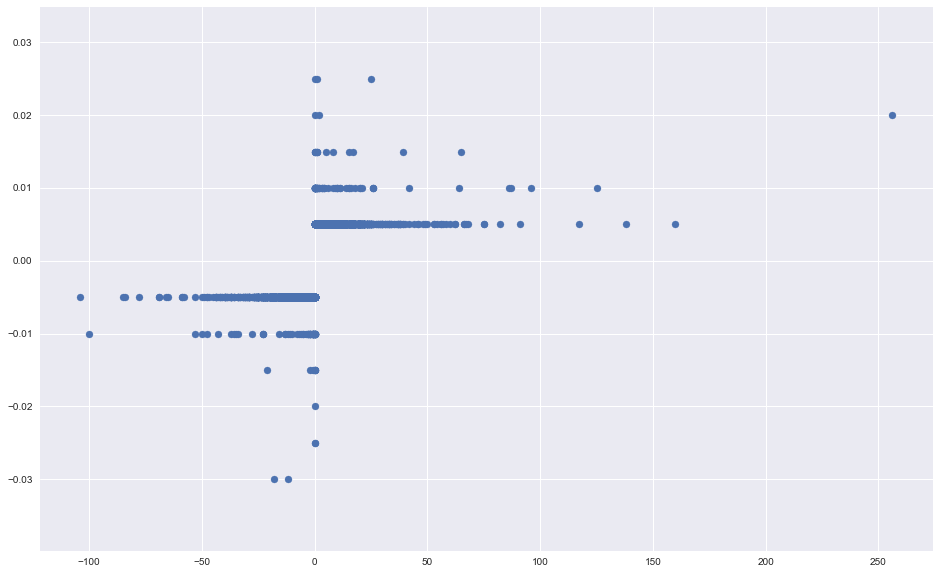

In [243]:
plt.scatter(df.voi, df.dmidprice);

Second feature will be simple order book imbalance, whereby: $I = V_b - V_a $

In [244]:
df['I'] = df['bidsize'] - df['asksize']

In [245]:
df.head()

,datetime,bidprice,bidsize,askprice,asksize,midprice,dmidprice,voi,I
8,2016-04-18 00:00:01.661,39.78,20,39.80,5,39.790,-0.005,0.0,15
16,2016-04-18 00:00:01.664,39.79,1,39.80,8,39.795,0.005,1.0,-7
40,2016-04-18 00:00:02.801,39.78,19,39.80,18,39.790,-0.005,0.0,1
47,2016-04-18 00:00:02.801,39.78,14,39.79,1,39.785,-0.005,-1.0,13
49,2016-04-18 00:00:02.805,39.78,12,39.80,20,39.790,0.005,0.0,-8


In [246]:
model = sm.OLS(df['dmidprice'], df['I']).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              dmidprice   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                 8.819e+04
Date:                Wed, 20 Sep 2017   Prob (F-statistic):               0.00
Time:                        10:13:09   Log-Likelihood:             5.2861e+05
No. Observations:              127715   AIC:                        -1.057e+06
Df Residuals:                  127714   BIC:                        -1.057e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I          -9.338e-05   3.14e-07   -296.972      0.000    -9.4e-05   -9.28e-05
==============================================================================
Omnibus:                      108.479   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.791
Skew:                          -0.058   Prob(JB):                     5.31e-25
Kurtosis:                       3.088   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [247]:
model = sm.OLS(df['dmidprice'], df[['I', 'voi']]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              dmidprice   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                 5.172e+04
Date:                Wed, 20 Sep 2017   Prob (F-statistic):               0.00
Time:                        10:13:09   Log-Likelihood:             5.3297e+05
No. Observations:              127715   AIC:                        -1.066e+06
Df Residuals:                  127713   BIC:                        -1.066e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I          -8.485e-05   3.17e-07   -267.787      0.000   -8.55e-05   -8.42e-05
voi            0.0003    3.5e-06     94.963      0.000       0.000       0.000
==============================================================================
Omnibus:                      467.736   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              498.134
Skew:                          -0.123   Prob(JB):                    6.78e-109
Kurtosis:                       3.183   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

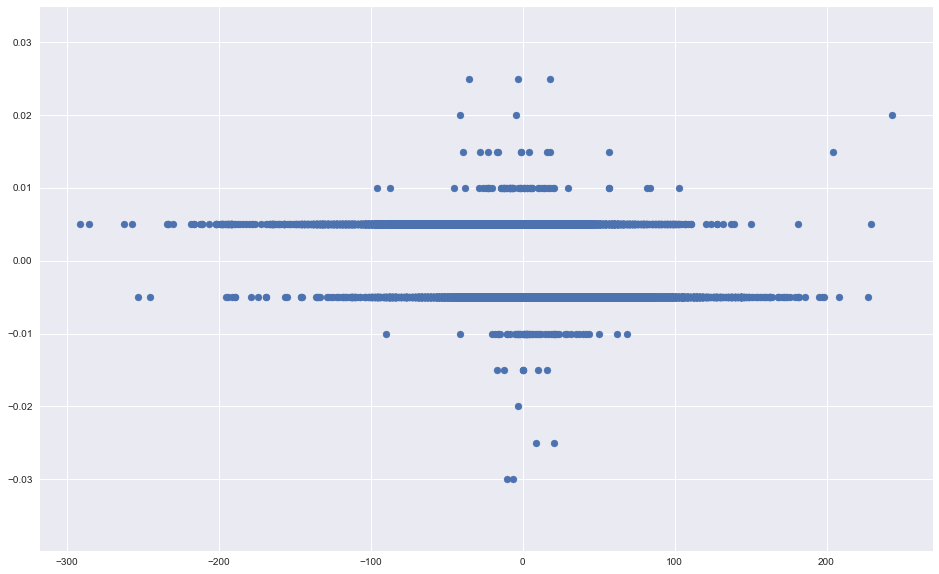

In [248]:
plt.scatter(df['I'], df['dmidprice'])

# Clustering

We will now apply clustering to S&P 500 daily close data to analyse which assets tend to move together by calculating Euclidean Distance between their returns. If we treat timeseries $a$ of a single asset as an $1 * n$ vector, then its Euclidean Distance or $L^2$ norm to the other $1 * n$ timeseries vector $b$ in $\mathbb{R}^n$ is given by:

$$d(a,b)=\sqrt{(x_{1}-y_{1})^{2}+(x_{2}-y_{2})^{2}+\cdots+(x_{n}-y_{n})^{2}}.$$

We proceed to create a symmetric distance matrix $D$ were $D_{i,j} = d(x_i,x_j)$. The first cluster of $x_i$ will be formed with timeseries of $x_j$ where distance $D_{i,j}$ is minimimal. Clusters are formed in algorithmic fashion whereby, the distance from the cluster to other points is taken to be the minimal distance of any points already clustered to the unclutered points. In this clustering example we have used $L^2$ norm as distance metric and a single linkage method. 

As an exercise, review and summarise other distance metrics and linkage methods that may be used in clustering. 

In [14]:
SP500 = pd.read_csv('data/SP500.csv', index_col='Date').dropna(axis = 1)
SP500Index = pd.read_csv('data/^GSPC.csv', index_col='Date')['Close'][:len(SP500)]
SP500moves = SP500.pct_change().dropna()
names = SP500moves.columns.values

NameError: name 'pd' is not defined

In [317]:
import scipy.spatial.distance as distance
sp500_distances = pd.DataFrame(index=names, columns = names)
for sym1 in names:
    for sym2 in names:
            sp500_distances[sym1][sym2] = distance.euclidean(SP500moves[sym1].values, SP500moves[sym2].values)

In [318]:
sp500_distances.head()

,A UN Equity,AAL UW Equity,AAP UN Equity,AAPL UW Equity,ABBV UN Equity,ABC UN Equity,ABT UN Equity,ACN UN Equity,ADBE UW Equity,ADI UW Equity,...,XL UN Equity,XLNX UW Equity,XOM UN Equity,XRAY UW Equity,XRX UN Equity,XYL UN Equity,YUM UN Equity,ZBH UN Equity,ZION UW Equity,ZTS UN Equity
A UN Equity,0,0.401714,0.460327,0.306089,0.32056,0.390425,0.253499,0.272817,0.263833,0.294667,...,0.326629,0.326728,0.301553,0.278996,0.38377,0.253156,0.271609,0.3045,0.352632,0.264864
AAL UW Equity,0.401714,0,0.547022,0.444662,0.482067,0.514696,0.42322,0.432922,0.424516,0.422925,...,0.44211,0.454102,0.451377,0.451958,0.494443,0.419565,0.410773,0.450978,0.424826,0.435101
AAP UN Equity,0.460327,0.547022,0,0.470887,0.484848,0.515787,0.433197,0.439694,0.464921,0.465364,...,0.462326,0.468087,0.435839,0.440342,0.501576,0.419167,0.425489,0.455984,0.49651,0.455856
AAPL UW Equity,0.306089,0.444662,0.470887,0,0.365851,0.4134,0.312783,0.303023,0.291813,0.295687,...,0.338173,0.334917,0.314381,0.336253,0.411655,0.310728,0.286953,0.345345,0.40396,0.319006
ABBV UN Equity,0.32056,0.482067,0.484848,0.365851,0,0.374245,0.305315,0.350605,0.347116,0.380389,...,0.378958,0.376078,0.33261,0.339811,0.448911,0.332235,0.349421,0.348468,0.424061,0.300737


# Dendrogram
Dendrogram is visual representation of clusters, whereby vertical node distances between points and clusters are the respective norms.

In [13]:
import plotly
plotly.tools.set_credentials_file(username='ed.silantyev', api_key='qKCGLdJRYoAD4eQdISSo')
import plotly.plotly as py
import plotly.figure_factory as ff
from scipy.cluster.hierarchy import linkage


dendro = ff.create_dendrogram(SP500moves.T.values, labels=names, 
                              linkagefun=lambda x:linkage(SP500moves.T.values, method = 'average', metric = 'euclidean'))
dendro['layout'].update({'width':800, 'height':500})
py.iplot(dendro, filename='simple_dendrogram')

NameError: name 'SP500moves' is not defined

In [335]:
SP500norm = (SP500 - SP500.mean())/SP500.std()

In [321]:
cov = SP500norm.cov()
eig_vals, eig_vecs = np.linalg.eig(cov)
eig_vals = np.real(eig_vals)
eig_vecs = np.real(eig_vecs)

In [323]:
from plotly.graph_objs import *
import plotly.tools as tls
import plotly.plotly as py

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

trace1 = Bar(
        x=['PC %s' %i for i in range(1,100)],
        y=var_exp,
        showlegend=False)

trace2 = Scatter(
        x=['PC %s' %i for i in range(1,100)], 
        y=cum_var_exp,
        name='cumulative explained variance')

data = Data([trace1, trace2])

layout=Layout(
        yaxis=YAxis(title='Explained variance in percent'),
        title='Explained variance by different principal components')

fig = Figure(data=data, layout=layout)
py.iplot(fig)

In [352]:
PCs = np.matmul(SP500norm.values, eig_vecs)
PCs = pd.DataFrame(PCs, index=SP500norm.index)
PCs['SP500'] = (SP500Index - SP500Index.mean())/SP500Index.std()

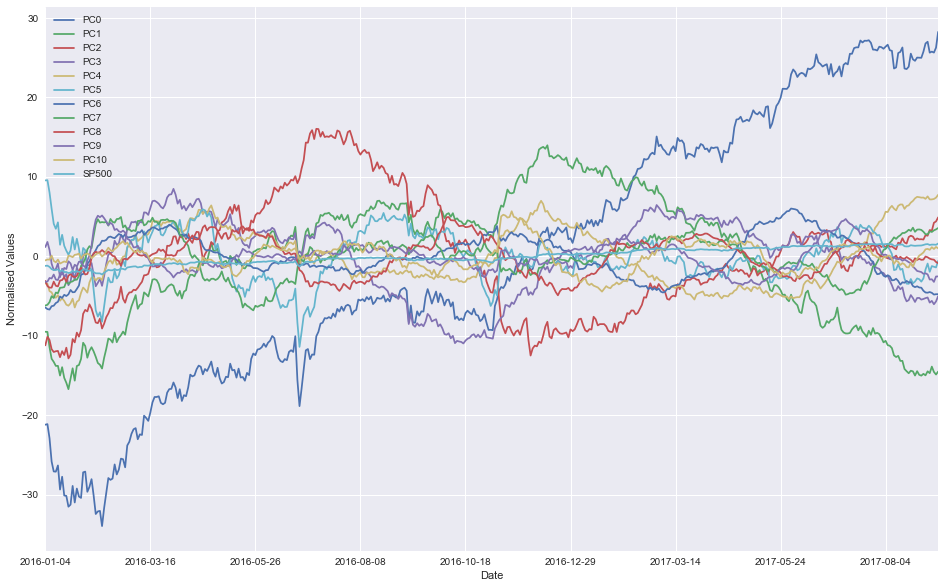

In [353]:
colnames = ['PC'+str(i) for i in np.arange(len(PCs.columns.values)-1)] + ['SP500']
PCs.columns = colnames
PC10 = PCs[['PC0','PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','SP500']]
PC10.plot()
plt.ylabel('Normalised Values')

In [382]:
from sklearn.decomposition import PCA

pca  = PCA(n_components=5)
pca_vals = pca.fit_transform(SP500norm)

In [399]:
pca_df = pd.DataFrame(pca_vals, index = PCs.index)
pca_df.columns = ['PC'+str(i) for i in np.arange(len(pca_df.columns.values))]
pca_df['SP500'] = PCs['SP500']

In [400]:
pca_df.head()

,PC0,PC1,PC2,PC3,PC4,SP500
Date,,,,,,
2016-01-04,21.186793,9.487142,-11.197773,-1.173359,-3.407102,-1.194516
2016-01-05,21.114977,9.512285,-10.120616,-1.817180,-3.441255,-1.170588
2016-01-06,22.890277,11.439580,-10.532902,-0.797287,-4.370991,-1.326860
2016-01-07,25.826703,12.890809,-11.687449,0.920288,-4.535546,-1.605550
2016-01-08,27.070804,13.282405,-12.038059,1.721094,-5.070359,-1.729976


In [404]:
pca_reg = sm.OLS(pca_df['SP500'], pca_df['PC0']).fit()
pca_reg.resid.describe()

count    4.260000e+02
mean    -3.477656e-15
std      9.143756e-02
min     -2.740602e-01
25%     -6.286788e-02
50%      5.341323e-04
75%      6.954186e-02
max      1.788778e-01
dtype: float64

In [348]:
PC10.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,SP500
Date,,,,,,,,,,,,
2016-01-04,-21.186793,-9.487142,-11.197773,1.173359,-3.407102,9.560404,-6.437528,-6.187638,-3.096566,-3.199364,-0.507503,-1.194516
2016-01-05,-21.114977,-9.512285,-10.120616,1.817180,-3.441255,9.590186,-6.635369,-6.096757,-3.732944,-3.173988,-0.394450,-1.170588
2016-01-06,-22.890277,-11.439580,-10.532902,0.797287,-4.370991,8.037445,-6.695528,-5.759743,-3.939145,-2.721482,-0.412069,-1.326860
2016-01-07,-25.826703,-12.890809,-11.687449,-0.920288,-4.535546,5.976917,-6.272108,-5.010411,-3.932149,-2.785252,0.095221,-1.605550
2016-01-08,-27.070804,-13.282405,-12.038059,-1.721094,-5.070359,4.104925,-6.210975,-5.245234,-3.176739,-2.285198,-0.566025,-1.729976


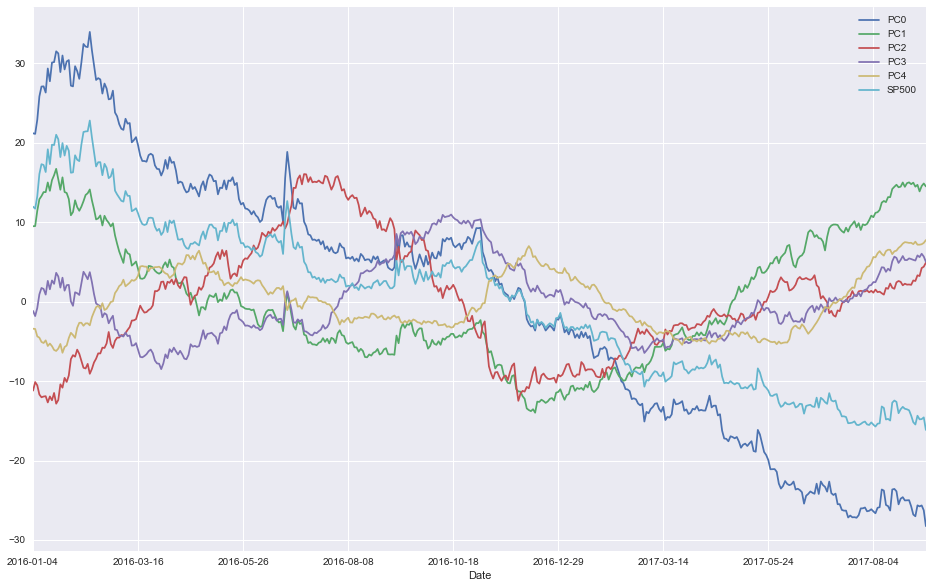

In [350]:
pca_df_old = pca_df.copy()
pca_df['SP500'] = -10. * pca_df_old['SP500']
pca_df.plot()

In [331]:
pca_df.describe()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,SP500
count,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02
mean,-6.963652e-15,-5.587601e-16,1.459448e-17,9.736604e-16,6.254778e-17,1.349989e-16,3.335881e-17,8.756689e-17,2.494093e-16,-1.605393e-16,5.055945e-17,-3.609528e-15
std,1.686046e+01,7.936308e+00,7.174584e+00,4.687864e+00,3.703495e+00,3.104654e+00,2.721683e+00,2.671952e+00,2.275690e+00,1.805809e+00,1.727423e+00,1.000000e+00
min,-2.825054e+01,-1.397999e+01,-1.284360e+01,-8.495637e+00,-6.435769e+00,-9.590186e+00,-6.018632e+00,-4.952790e+00,-4.898712e+00,-3.588192e+00,-4.436537e+00,-2.279144e+00
25%,-1.403953e+01,-5.640404e+00,-5.346634e+00,-3.709526e+00,-2.992129e+00,-2.429471e+00,-2.298091e+00,-1.854869e+00,-2.004483e+00,-1.268733e+00,-1.088212e+00,-7.423028e-01
50%,4.305570e+00,-2.155021e+00,5.660397e-02,-8.529006e-01,-5.887864e-01,1.187201e-01,2.177948e-01,-2.286752e-01,1.607150e-01,-3.975130e-02,4.565737e-02,-1.914815e-01
75%,1.292366e+01,5.927500e+00,3.381653e+00,3.130733e+00,3.062557e+00,1.750561e+00,1.812212e+00,1.606097e+00,1.717955e+00,1.001592e+00,1.090748e+00,9.132339e-01
max,3.394884e+01,1.671542e+01,1.605206e+01,1.096196e+01,7.743891e+00,1.138980e+01,6.695528e+00,6.794159e+00,4.951395e+00,5.143583e+00,5.674180e+00,1.614538e+00


https://stackoverflow.com/questions/21115669/scikit-learn-pca-matrix-transformation-produces-pc-estimates-with-flipped-signs

In [332]:
SP500norm['SP500'] = pca_df['SP500']
pca_df['SP500'] = pca_df['SP500'].shift(-1)
SP500norm['SP500'] = SP500norm['SP500'].shift(-1)
pca_df.dropna(inplace=True)
SP500norm.dropna(inplace=True)
pca_reg = sm.OLS(pca_df['SP500'], pca_df.drop(['SP500'], axis = 1)).fit()
non_pca_reg = sm.OLS(pca_df['SP500'], SP500norm.drop(['SP500'], axis = 1)).fit()

In [333]:
pca_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  SP500   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     5260.
Date:                Wed, 20 Sep 2017   Prob (F-statistic):               0.00
Time:                        11:04:57   Log-Likelihood:                 448.91
No. Observations:                 425   AIC:                            -875.8
Df Residuals:                     414   BIC:                            -831.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PC0           -0.0590      0.000   -239.676      0.000      -0.059      -0.059
PC1           -0.0076      0.001    -14.488      0.000      -0.009      -0.007
PC2            0.0023      0.001      4.058      0.000       0.001       0.003
PC3           -0.0069      0.001     -7.848      0.000      -0.009      -0.005
PC4            0.0033      0.001      2.948      0.003       0.001       0.006
PC5           -0.0059      0.001     -4.439      0.000      -0.009      -0.003
PC6            0.0042      0.002      2.749      0.006       0.001       0.007
PC7           -0.0107      0.002     -6.880      0.000      -0.014      -0.008
PC8           -0.0039      0.002     -2.121      0.035      -0.007      -0.000
PC9           -0.0005      0.002     -0.219      0.827      -0.005       0.004
PC10          -0.0007      0.002     -0.302      0.763      -0.005       0.004
==============================================================================
Omnibus:                       76.512   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.490
Skew:                          -0.798   Prob(JB):                     2.45e-55
Kurtosis:                       6.414   Cond. No.                         9.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""